# Systems and Signals 414 Practical 2: Using the DFT

**Aim:** Understand the use of the DFT in discrete-time signal analysis.

**Hand in:** Please hand in this notebook as a PDF file on sunlearn by Sunday, 4 March at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook). After exporting your notebook, upload the PDF by clicking on `Practical 2 submission` on sunlearn and following the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a Numpy or Scipy function, go look up the usage at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [1]:
#All the necessary imports

#%matplotlib notebook
%matplotlib inline

import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

#Nicer matplotlib dimensions
pl.rcParams['figure.figsize'] = (9,3)

#A helper-function to setup a proper plot
def setup_plot(title, y_label='', x_label='', newfig=True):
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)

#A helper function to plot an additional x-axis at the top
def add_top_axis(x_values, x_label=''):
    _, b = pl.rcParams['figure.figsize']
    pl.gca().title.set_position([.5, 1.18])
    ax1 = pl.gca()
    ax2 = ax1.twiny()
    ax2.margins(*(pl.array(ax1.margins())))
    ln, = ax2.plot(x_values, np.zeros_like(x_values)) # Create a dummy plot
    ln.remove()
    ax2.set_xlabel(x_label)
    
#Download yesterday.wav from courses.ee.sun.ac.za and return it as a numpy array
def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

## Questions

The audio for today is the solo from [Baker Street](http://www.youtube.com/watch?v=Fo6aKnRnBxM), with Rick Sanchez as backup singer.

Use proper Markdown headings (by changing the cell type) to differentiate between Question 1, Question 2, etc. and label your graphs properly.

### Question 1

Download the audio file `bakerickstreet_noisy.wav` from  sunlearn. Then use the provided function, `download_and_load_audio` to read the audio waveform file into a NumPy array. We consider this array as the discrete-time signal $x[n]$.

Load and listen to the signal using `IPython.display.Audio`. Note the high-pitch sinusoidal noise contained in the signal.

**1.1)** Find two frequency $f_1$ and $f_2$ (in Hz) for the two interfering sinusoidal signals in $x[n]$. Do so by first calculating $X[k]$ (using `np.fft.fft`), then plotting $|X[k]|$ against the $f_\omega$ axis, and finally reading the noisy $f_\omega$ responses off the graph.<br>
*Note:* Audio in general is non-stationary, but here we are looking for sinusoids (which are stationary), so we can just take the DFT of the entire signal.<br>
*NB:* To generate interactive graphs with zoom-in functionality for better interpretation; replace `%matplotlib inline` in the preample block with `%matplotlib notebook`, restart the kernel, and rerun the necessary blocks. Afterwards, change the plotting settings back to `%matplotlib inline` in a likewise manner before handing in the exported PDF.

**1.2)** Consider the noise contained in signal $x[n]$ as the signal $q[n]$ such that
$$q(t) = \sin(f_1\cdot 2\pi t) + \sin(f_2 \cdot 2\pi t)$$ $$q[n] = q(t) {\rm\ sampled\ at\ } F_s=10{\rm kHz}.$$ Now generate 5 seconds worth of $q[n]$  (derive your timing info from $F_s$) and play it using `IPython.display.Audio`. Does it sound similar to the noise found in signal $x[n]$?

**1.3)** Plot the magnitude response $|Q[k]|$ against the $f_\omega$ axis. Are there a similarity between $Q[k]$ and $X[k]$?

**1.4)** Generate the signal $y[n]$ by filtering out the the interfering sinusoidal noise from $x[n]$. Do so by applying the following difference equation to $x[n]$  (same procedure as Practical 0):<br>
$\ \ \ \ \ \ \ \ \ \ \ y[i] = (x[i]  -1.18 x[i-1]  +2.00 x[i-2]   -1.18x[i-3] \ \ \ \ \ \ + x[i-4] $<br>
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \  \ \ \ \ \  +1.13 y[i-1]  -1.84y[i-2] + 1.04y[i-3] -0.85y[i-4] )$<br>
For any out-of-bound access to indices (that is for $i<0$ and for $i>=N$), assume an array value of 0. Please keep $y[n]$ the same length as $x[n]$, since the length was specifically chosen to be a factor of 2 for FFT optimisation.<br>
*Helpful hint and tip:* In Python, when indexing an array/list with a negative number, such as `arr[-a]` for $a=1,2,\ldots$, it returns the value at index `N-1-i`. Therefore, to avoid boundary checking when applying the difference equation, we can append 4 zeros to $x[n]$ (using numpy: $x_{\rm ext}$ `= np.r_[`$x$ `,0,0,0,0]`), and not worry about negative indices when accessing $x_{\rm ext}[-a]$. Please ensure that the output lengths is correct, ${\rm len}(y[n]) = {\rm len}(x[n])$, by looping only ${\rm len}(x[n])$ times.

Plot $|Y[k]|$ against the $f_\omega$ axis to ensure all the noise components are gone and play the audio signal $y[n]$ using `IPython.display.Audio`.

**5)** Calculate the impulse response $h[n]$ of the filter in 1.4, by applying the filter on an impulse signal $\delta[n]=[1,0,0,\ldots,0]$ with the same length as $x[n]$.<br>
a) What would the DFT for $\delta[n]$ look like?<br>
b) Plot the frequency response $|H[k]|$ against the $f_\omega$ axis.

### Question 2:
For the signal $x(t)$ and $x[n]$, we have<br>
$\ \ \ \ \ x(t) = \sin(4000 \cdot2\pi t)$, and<br>
$\ \ \ \ \ x[n] = x(t)$  sampled at $F_s=12$kHz for $5$ periods of $x(t)$.<br>


**2.1)** Sketch (by hand) the magnitude spectrum $|X(f)|$ of $x(t)$. Then sketch (by hand) the magnitude spectrum $|X[k]|$ of $x[n]$, assuming we take the DFT window over all $5$ periods.

**2.2)** Stem the signal $x[n]$ against the sample time axis and stem the magnitude spectra $|X[k]|$ against the sample frequency axis.

**2.3)** Generate $\tilde{x}[n]$ as a zero-padded $x[n]$ of 10 times the original length, and stem $|\tilde{X}[k]|$ against the $k$ axis.

**2.4)** Compose $\hat{X}[k]$ as the DFT of $x[n]$, but zero-padded to 10 times the original size by adding zeros to the center of the $X[k]$ array. Determine and stem the IDFT $\hat{x}[n]$ and the original $x[n]$ as two different plots. <br> *Remember:* Where should the zeros go when zero-padding $X[k]$?

### Question 3:
For the signal $p(t)$ and $p[n]$, we have<br>
$\ \ \ \ \ p(t) = \cos(900\cdot2\pi t)+0.15\cos(800\cdot2\pi t).$, and<br>
$\ \ \ \ \ p[n] = p(t)$  sampled at $F_s=2$kHz for 50 samples.<br>


**3.1)** Stem the 50-point DFT magnitude spectrum $|P[k]|$ of $p[n]$ against the $f_\omega$ axis.

**3.2)** Estimate the frequencies present in $p[n]$ from the plot in 3.1. Why is it difficult?

**3.3)** Generate $\tilde{p}[n]$ as a zero-padded $p[n]$ of 100 times the original length, and plot (not stem) $|\tilde{P}[k]|$ against the $f_\omega$ axis.

**3.4)** Generate $\hat{p}[n]$ by applying a Hamming-window to $p[n]$ and zero-padding the signal to be of 100 times the original length. Plot (not stem) $|\hat{P}[k]|$ against the $f_\omega$ axis.

**3.5)** Comment on the differences between 3.2, 3.3, and 3.4 with regard to the ease of determining the frequencies.

### Bonus Question
What is the the sequel to *Roy: A life well lived*?

### Additional Question
**Although you do not need to hand in this question, testweek is coming, so keep fit!**

**A.1)** Consider the following sequence $X[k] = \{0, 1, 1\}$, what is the solution for $x[n]$, the IDFT of $X[k]$, as a discrete-time sinusoid.

**A.2)** Obtain $\tilde{X}[k]$ by zero-padding $X[k]$ appropriately to be 100 samples of length. Where would you add the zeros? What would be the solution for $\tilde{x}[n]$, the IDFT of $\tilde{X}[k]$, as a discrete-time sinusoid?

**A.3)** Generate the signals in 4.1 and 4.2 in Python; stem $\tilde{X}[k]$ and plot $\tilde{x}[n]$.

### Coding examples
**Plotting an additional axis**

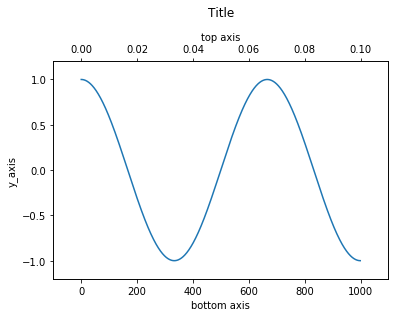

In [2]:
#Normal plot with matplotlib plot and setup_plot helper
setup_plot('Title', 'y_axis', 'bottom axis')
pl.plot(np.arange(1000), np.cos(np.linspace(0, 3*np.pi, 1000)));

#Add an extra x-axis at the top with 1e-4 scale
add_top_axis(np.arange(1000)*1e-4, 'top axis')

**Note the difference between linspace and arange:**

In [3]:
#Every second element from 0 upto (but excluding) 10
print('a)', np.arange(0,10,1))

#5 elements from 0 upto (but excluding) 10
print('b)', np.linspace(0,10,10,False))

#5 elements from 0 upto 10 (avoid!!!)
print('c)', np.linspace(0,10,10))

a) [0 1 2 3 4 5 6 7 8 9]
b) [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
c) [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


#### Audio player with Ipython.lib.display.Audio

In [4]:
example_signal = np.sin(2*np.pi*500*np.linspace(0,5,50000))
IPython.lib.display.Audio(rate=10000,
                          data=example_signal)

#### Plotting the spectrum of a signal

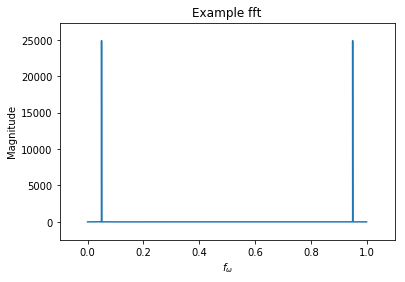

In [5]:
#Plotting the spectrum of a signal
example_fft = np.fft.fft(example_signal) 
example_fw_axis = np.linspace(0, 1, len(example_fft), False)

setup_plot('Example fft', 'Magnitude', '$f_\omega$')
pl.plot(example_fw_axis, np.abs(example_fft));

# Answer space:

## Question 1

In [6]:
rate, adata = download_and_load_audio("bakerickstreet_noisy.wav")
IPython.lib.display.Audio(rate=rate, data=adata)

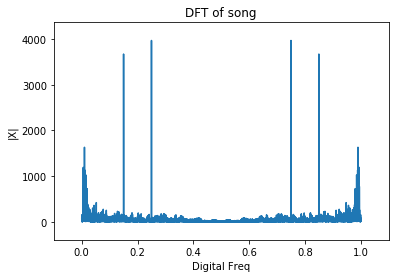

In [7]:
#1.1
X = np.fft.fft(adata)
fw = np.linspace(0, 1, X.size, False)
setup_plot('DFT of song', '|X|', 'Digital Freq')
pl.plot(fw, np.abs(X))


f1 = 0.15 and f2 = 0.25

In [8]:
#1.2
f1 = 0.15 * rate
f2 = 0.25 * rate
fs = 10000

time = np.linspace(0, 5, 5*fs, False)
q = np.sin(2 * np.pi * time * f1) + np.sin(2 * np.pi * time * f2)

IPython.lib.display.Audio(rate=fs, data=q)

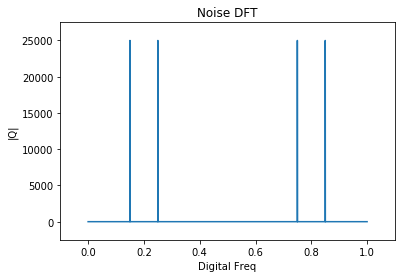

In [9]:
#1.3
Q = np.fft.fft(q)
fw = np.linspace(0, 1, Q.size, False)

setup_plot('Noise DFT', '|Q|', 'Digital Freq')
pl.plot(fw, np.abs(Q))

The impulses are the same as in X just without the other peaks in the signal

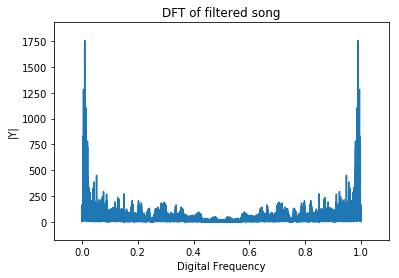

In [10]:
#1.4
x = np.array(adata)
y = np.append(x, np.zeros(4))

for i in range(adata.size):
    y[i] += -1.18*x[i-1] +2*x[i-2] -1.18*x[i-3] + x[i-4] + 1.13*y[i-1] -1.84*y[i-2] +1.04*y[i-3] -0.85*y[i-4]
    
y = y[:-4]
fwy = np.linspace(0, 1, y.size, False)

setup_plot('DFT of filtered song', '|Y|', 'Digital Frequency' )
pl.plot(fwy, np.abs(np.fft.fft(y)))
IPython.lib.display.Audio(rate = rate, data = y)

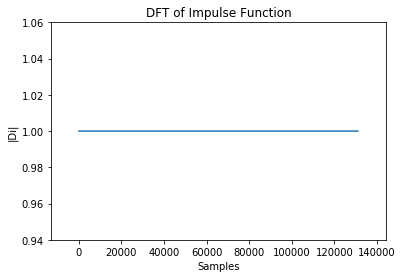

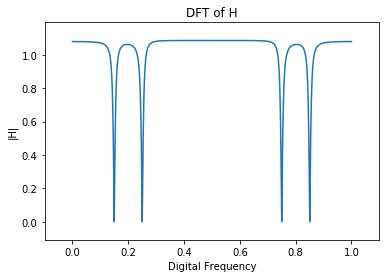

In [11]:
#1.5
di = np.append(np.ones(1), np.zeros(adata.size +3))
Di = np.abs(np.fft.fft(di))
setup_plot('DFT of Impulse Function', '|Di|', 'Samples')
pl.plot(Di);

h = np.array(di)
for i in range(adata.size):
     h[i] += -1.18*di[i-1] +2*di[i-2] -1.18*di[i-3] + di[i-4] + 1.13*h[i-1] -1.84*h[i-2] +1.04*h[i-3] -0.85*h[i-4]
        
h = h[:-4]
fwh = np.linspace(0, 1, h.size, False)
setup_plot('DFT of H', '|H|', 'Digital Frequency' )
pl.plot(fwh, np.abs(np.fft.fft(h)))

## Question 2

<Container object of 3 artists>

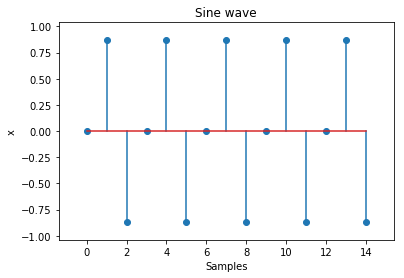

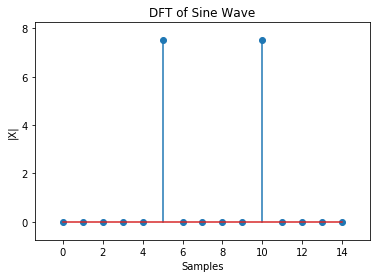

In [12]:
#2.1 - Answered on paper
#2.2
f = 4000
fs = 12000
samples = 5

t = np.linspace(0, samples/f, int(samples*fs/f), False)
x = np.sin(f * 2 * np.pi* t)
X = np.abs(np.fft.fft(x))

setup_plot('Sine wave', 'x', 'Samples')
pl.stem(x)

setup_plot('DFT of Sine Wave', '|X|', 'Samples')
pl.stem(X)

<Container object of 3 artists>

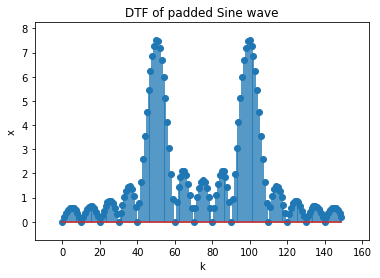

In [13]:
#2.3
t2 = np.append(t, np.zeros(int(9*samples*fs/f)))
x2 = np.sin(f * 2 * np.pi * t2)
X2 = np.abs(np.fft.fft(x2))
setup_plot('DTF of padded Sine wave', 'x', 'k')
pl.stem(X2)

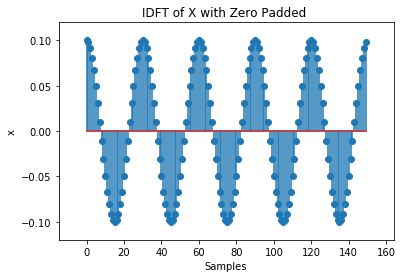

In [14]:
#2.4
p1 = int(X.size/2)
p2 = X[p1:]
X = np.append(X[:p1], np.zeros(X.size * 9))
X = np.append(X, p2)

xt = np.real(np.fft.ifft(X))
setup_plot('IDFT of X with Zero Padded ', 'x', 'Samples')
pl.stem(xt);

## Question 3

<Container object of 3 artists>

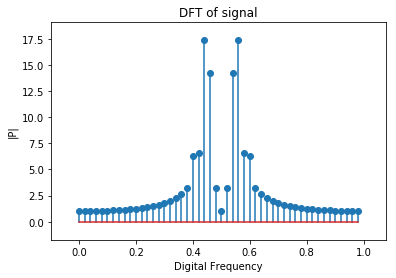

In [15]:
#3.1
fs = 2000
samples = 50
fw = np.linspace(0, 1, samples, False)
t = np.linspace(0, samples/fs, samples, False)
p = np.cos(1800 * np.pi * t) + 0.15*np.cos(1600* np.pi * t)
P = np.abs(np.fft.fft(p))

setup_plot('DFT of signal', '|P|', 'Digital Frequency')
pl.stem(fw, P)

3.2 - The low sampling resoltion makes it dificult to get an exact value, however 0.45 and 0.55 would be approximate.

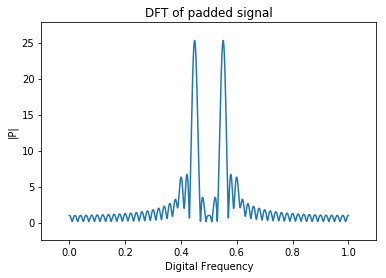

In [17]:
#3.3
p2 = np.append(p, np.zeros(99*samples))
P2 = np.abs(np.fft.fft(p2))
fw2 = np.linspace(0, 1, 100*samples, False)

setup_plot('DFT of padded signal', '|P|', 'Digital Frequency')
pl.plot(fw2, P2)

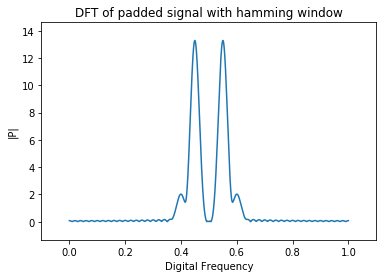

In [18]:
#3.4
ham = np.hamming(p.size)
window = ham*p
window = np.append(window, np.zeros(99 * samples))

P3 = np.abs(np.fft.fft(window))
setup_plot('DFT of padded signal with hamming window', '|P|', 'Digital Frequency')
pl.plot(fw2, P3)

3.5 - In 3.2 there is not enough detail, in 3.3 it is easier, however noise is still present. in 3.4 it is the easiest to determine due to its resolution and low noise

## Bonus

<Container object of 3 artists>

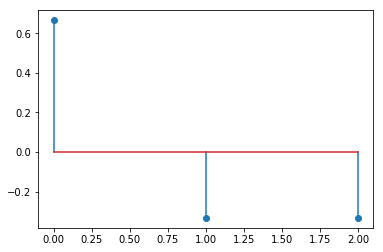

In [19]:
X = [0, 1, 1]
pl.stem(np.real(np.fft.ifft(X)))

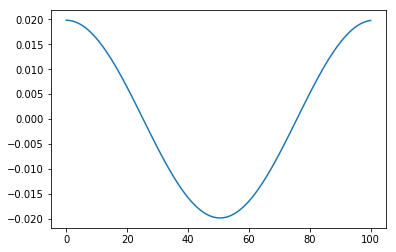

In [20]:
X = np.array([0, 1])
X = np.append(X, np.zeros(98))
X = np.append(X, [1])
pl.plot(np.real(np.fft.ifft(X)));